In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import sklearn

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [12]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [13]:
people = 'people30000'
seed = '123'
csv = 'census'

# 全体の回帰直線

y =             2
-0.001236 x + 3.44 x + 2.774
相関 =  0.8753863560380352
R^2 =  -1.3055938288580018


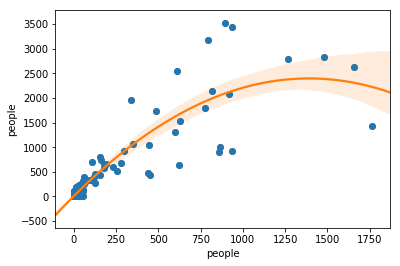

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

df = csv_array[people][seed].copy()
trainX = df['mobile']['people'] 
trainY = df['census']['people']
# trainX = df['mobile']['people'] / df['mobile']['people'].sum()
# trainY = df['census']['people'] / df['census']['people'].sum()

# plt.figure(dpi=600)
plt.xlabel('モバイル空間統計')
plt.ylabel('道路交通センサス')
plt.plot(trainX, trainY, 'o')

order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=75)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
print('R^2 = ', r2_score(trainX, trainY))
p = np.asanyarray(p)

x = trainX
y = p[0]*x**2 + p[1]*x + p[2]


# plt.savefig('correlation_{0}.png'.format(people))